## Euclidean and Cosine distance
Euclidean :  $$d(x,y)=\sqrt{\sum^n_{i=1}(x_i - y_i)^2}$$
 
Cosine:  $$\theta(x,y)=\frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}}$$

The Cosine metric is a measurement of orientation and not magnitude, Cosine不看magnitude(強度),只在乎是否2個向量是否具有相同方向 (且不一定要具有相同向量空間).而Euclidean是要是相同向量空間且magnitude會響他的距離. Cosine Similarity 常用在文章分類, 因為文章出現關鍵詞種類愈多比較重要,而不是某一個個關鍵詞出現很
多次 (因為很有可能出現的很多次, 其實只是這篇文章寫得比較長而已)
 


In [4]:
import numpy as np 
from math import log
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))


def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

## Preparing the Data

In [62]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])



In [63]:
#numpy slicing
print(X[1:3,1])
print(X[[2,4],1])
print(X[1:3])

[9.9 8.3]
[8.3 2.7]
[[9.7 9.9 2. ]
 [8.  8.3 2. ]]


In [22]:
df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


In [15]:
df[df['label'] == 2].plot

,weight,length,label
1,9.7,9.9,2.0
2,8.0,8.3,2.0
9,9.5,9.9,2.0
10,8.9,8.9,2.0
11,8.7,9.5,2.0


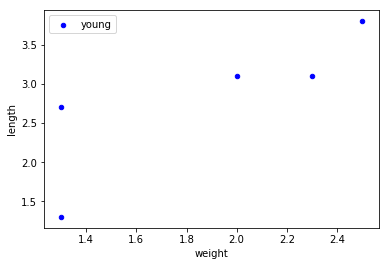

In [17]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')

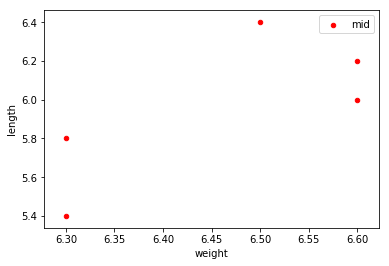

In [18]:
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='red', label='mid')

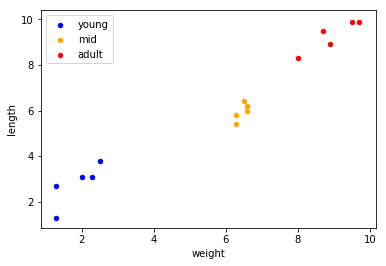

In [80]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)

    Considering instance #0, #1, and #4 to be our known instances, we assume that we don’t know the label of #14. Plotting this will look as follows:

df2:
--------------
    weight  length  label
0     6.6     6.2    1.0
1     9.7     9.9    2.0
4     1.3     2.7    0.0
df3:
--------------
     weight  length  label
14     1.3     1.3    0.0


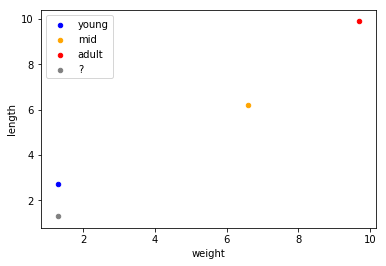

In [81]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])
print("df2:\n--------------\n",df2)
print("df3:\n--------------\n",df3)
ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)

In [38]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)
print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]
 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


In [39]:
print("label: \n x0:", X[0][-1:], "\n x1:", X[1][-1:], "\n x4:",X[4][-1:], "\nx14:", X[14][-1:])

label: 
 x0: [1.] 
 x1: [2.] 
 x4: [0.] 
x14: [0.]


## Euclidean v.s. Cosine distance

In [95]:
a=np.array([1,0,0,0])
b=np.array([1,0,1,1])
c=np.array([1,1,1,1])
d=np.array([10,0,0,0])

print("cosine(a,c):",cosine_similarity(a, c))
print("cosine(b,c):",cosine_similarity(b, c))
print("cosine(c,c):",cosine_similarity(c, c))
print("cosine(a,d):",cosine_similarity(a, d))

print("euclidean_distance(a,c):",euclidean_distance(a, c))
print("euclidean_distance(b,c):",euclidean_distance(b, c))
print("euclidean_distance(c,c):",euclidean_distance(c, c))
print("euclidean_distance(a,d):",euclidean_distance(a, d))

cosine(a,c): 0.5
cosine(b,c): 0.8660254037844387
cosine(c,c): 1.0
cosine(a,d): 1.0
euclidean_distance(a,c): 1.7320508075688772
euclidean_distance(b,c): 1.0
euclidean_distance(c,c): 0.0
euclidean_distance(a,d): 9.0


In [89]:
print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174
